### https://www.facebook.com/10166348614710182/videos/364804365742605
Palestra strogatz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rd
import networkx as nx
import pandas as pd

### Kuramoto Discrete Model

$\theta_i^h(n+1) = \theta_i^h(n) + h \Omega_i + \frac{hK}{N}\sum_{j=1}^N \sin(\theta_j^h(n) -\theta_i^h(n))$, $n=0,1,2,..$, $1 \leq i \leq N$

$\theta$ fase do oscilador, $\Omega$ frequencia natural, $h := \Delta t$ , $K$ constante de acoplamento, $N$ número de osciladores acoplados, $n$ passo


$\theta_i^h(n+1) = \theta_i^0$, $\sum_{i=1}^N \theta_i^0 = 0$ 

In [2]:
class Agent:
    def __init__(self, i, posx, posy, v, D, raio, theta,omega):
        #Possição e velocidade
        self.posx = posx 
        self.posy = posy 
        self.v = v
        self.D = D
        #Id do agente
        self.indice= i
        self.nome="Pessoa "+str(i)
        #Condições
        self.raio = raio
        self.theta = theta
        self.omega = omega
        self.theta_i = np.random.uniform(-2*np.pi,2*np.pi)
    def __str__(self):
        return self.nome+" na posicao ("+str(self.posx)+", "+str(self.posy) +")"
    def position(self,dt): 
        cu = np.random.uniform(-2*np.pi,2*np.pi)#self.theta_i
        if self.posx >= self.D or self.posy >= self.D:
            self.posx = -self.D + self.v*np.cos(cu)*dt #np.random.uniform(-np.pi,-0.001)*self.v
            self.posy = -self.D + self.v*np.sin(cu)*dt #np.random.uniform(-1,1)*self.v
        if self.posx <= -self.D or self.posy <= -self.D:
            self.posx = self.D + self.v*np.cos(cu)*dt #np.random.uniform(0,1)*self.v
            self.posy = self.D + self.v*np.sin(cu)*dt #np.random.uniform(0.001,np.pi)*self.v
        else: 
            self.posx = self.posx + self.v*np.cos(cu)*dt#np.random.uniform(-0.01,0.01)*self.v 
            self.posy = self.posy + self.v*np.sin(cu)*dt#np.random.uniform(-0.01,0.01)*self.v
        #cu += np.random.uniform(-np.pi,np.pi)
    def get_pos(self):
        return (self.posx,self.posy)
    def get_dist(self,x,y):
        return np.sqrt((self.posx-x)**2+(self.posy-y)**2)    

In [9]:
def simulation(frame,tempo, k):
    thetas = {}
    thetas_anteriores = k[frame-1]
    #print(thetas_anteriores)
    dt = 0.01
    constante_aco = 0.5
    N = n
    #omega = np.pi
    for p in pessoas:
        #p.check_contagio(frame) 
        p.position(dt) 
        for per in pessoas:
            per.get_pos()
            d = p.get_dist(per.posx,per.posy)
            thetas_proximos = []
            if d < p.raio:
                ##per.theta = thetas_anteriores.get(per.indice) + h*per.omega +( (h*k/N) *(np.sin(p.theta - per.theta) ))
                #p.theta = thetas_anteriores.get(p.indice) + h*p.omega +( (h*k/N) *(np.sin(per.theta - p.theta) ))
                thetas_proximos.append(per.theta)
                #thetas_anteriores = 0
            thetas[p.indice] = p.theta
        if thetas_proximos == []:
            pass
        else:
            cu = []
            for i in range(0,len(thetas_proximos)):
                cu.append(thetas_proximos[i]-p.theta)
            p.theta = thetas_anteriores.get(p.indice) + (dt*p.omega) +((dt*constante_aco/len(cu))*(sum(np.sin(cu))))
            #p.theta = thetas_anteriores.get(p.indice) +((dt*k/len(cu))*(sum(np.sin(cu))))
    #posicaox.append(p.posx)
    #posicaoy.append(p.posy)
    tempo.append(frame)
    return thetas

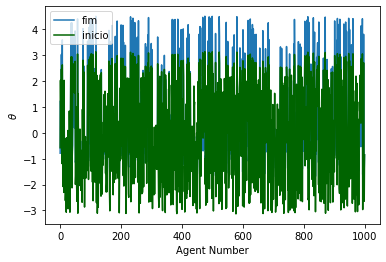

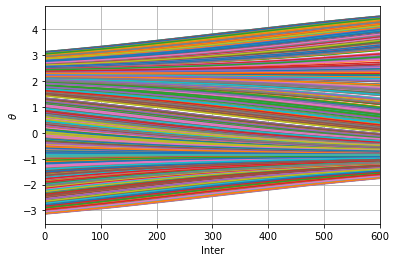

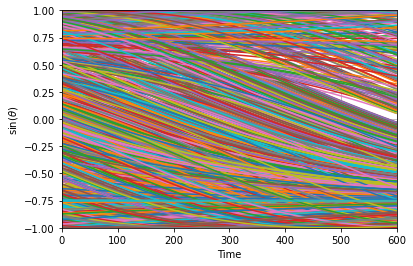

In [10]:
# import random as rd
n = 1000 #Número de pessoas
r_contagio = 24.1  #raio de acomplamento
D = 200 #Dimension
v = 10 #velocidade
inter = 600 #tempo
#omega_agent = np.pi

pessoas = []

posicao_inicial_x = n*[rd.uniform(-D,D)]#Distribuir os pontos uniformente sobre a superficie
posicao_inicial_y = n*[rd.uniform(-D,D)]

thetas = {}
for i in range(n):
    theta_agent = rd.uniform(-np.pi,np.pi)
    omega_agent = 0#np.random.random_integers(0,1)#0 #rd.uniform(0,1)
    p = Agent(i,posicao_inicial_x[i],posicao_inicial_y[i],v, D,r_contagio,theta_agent,omega_agent)
    pessoas.append(p)
    thetas[p.indice] = p.theta


posicaox = []
posicaoy = []
posicaoz = []
tempo = [0]

k= [thetas]
k1 = []
#print(k)
for i in range(1,inter):
    k.append(simulation(i,tempo,k))
#    print(k)
    #print("Porcentagem de conclusão: " ,'%.2f'%((i/inter)*100),'%') 
    #k1 = k
#print(k[inter-1])

myDictionary = k[inter-1]
# no = []
# for values in myDictionary:
#     no.append(np.sin(values))
# print(no)
plt.plot(myDictionary.keys(), myDictionary.values(), label = "fim")

# cu = np.sin(k[0])
plt.plot(thetas.keys(), thetas.values(), color = 'darkgreen', label  = 'inicio')
plt.legend(loc = "best")
plt.xlabel("Agent Number")
plt.ylabel(r'$\theta$')

df = pd.DataFrame(k)
df.plot(legend= False, grid = True, xlabel = "Inter", ylabel = r"$\theta$", xlim = (0,inter))


sines = df.transform(lambda x: np.sin(x))
sines.plot(legend = False, xlabel = "Time", ylabel = r"$\sin(\theta)$",
        grid = True, xlim = (0,inter), ylim = (-1,1))

plt.show()

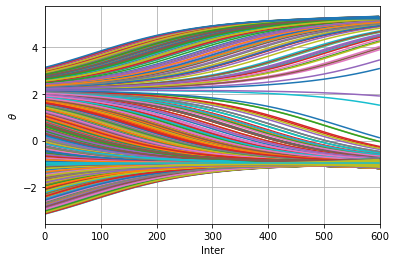

In [5]:
# df = pd.DataFrame(k)
# df.plot(legend= False, grid = True, xlabel = "Inter", ylabel = r"$\theta$", xlim = (0,inter))
# plt.savefig("teste_acomplamento15_milagentes_theta.png", dpi = 150)
# plt.show()

79.6 ms ± 1.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


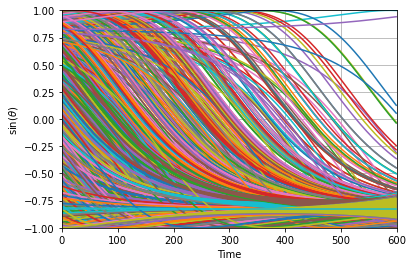

In [6]:
# %timeit df.transform(lambda x: np.sin(x))
# cu = df.transform(lambda x: np.sin(x))
# cu.plot(legend = False, xlabel = "Time", ylabel = r"$\sin(\theta)$",
#        grid = True, xlim = (0,inter), ylim = (-1,1))
# plt.savefig("teste_acomplamento15_milagentes_seno.png",dpi = 150)
# plt.show()

$r(t)e^{i \psi(t)} = \frac{1}{N}\sum_{j=1}^N e^{i \theta_j(t)}$, com $0 \leq r(t) \leq 1$

### Global Order Parameter 
#### $r_G e^{i \Psi} = \frac{1}{N}\sum_{j=1}^N e^{i \varphi_j}$
Where $\Psi$ denotes average phase of all oscillators in system. 

In [7]:
df.iloc[-1:]

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
599,-0.812222,-0.994741,-0.838529,-0.785752,-0.863515,5.194449,-0.795015,-0.999005,-0.800483,-0.878876,...,5.214834,-1.195382,-0.778416,-0.873992,-1.182463,-0.790521,-0.659714,-1.157865,-1.134081,-0.966343


In [11]:
senos_finais = np.array(df.iloc[-1:])[0]
senos_finais_media = np.mean(senos_finais)
aaaa = []
for i in range(len(senos_finais)):
    aaaa.append(np.cos(senos_finais[i])+1j*np.sin(senos_finais[i]))
print( (1/n)*(1/np.exp(1j*senos_finais_media))*sum(aaaa)  )

r_g = (1/n)*(1/np.exp(1j*senos_finais_media))*sum(np.exp(1j*senos_finais))
print(np.absolute(r_g)) ## Agora ta fazendo, antes estava pegando os valores de senos e nao de theta
print(abs(r_g))

(0.3556687461667902-0.5004388099277441j)
0.6139537926275507
0.6139537926275507
